# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
> **TMDb Movie Data** : This comma separated file contains movie details of over 10000 movies which includes various columns related to movie.

>Dataset contains **10866** records with **21** columns which are listed below. However not all columns are fully filled especially homepage, tagline, keywords. 

>This means we need to clean up the data before we proceed towards **analysis**




### Question(s) for Analysis
> **Question 1** : Which year has the highest number of movies released ?

> **Question 2** : Find the lowest profit movie and highest profit movie in the database ?

> **Question 3** : Highest Budget Movie and Lowest Budget Movie ?

> **Question 4** : Find 10 High budget movies ?

> **Question 5** : Find 10 high revenue movies ?

> **Question 6** : Find Top 10 high profit movies ?

> **Question 7** : Which Genre movies produced more over years ?

> **Question 8** : Top 10 Actors and Number of Movies they acted

> **Question 9** : Top 10 Directors with Count of Movies

> **Question 10** : Popularity vs Runtime - Can we infer something from this data ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#Load the CSV file and display the info
df = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling
Following steps are performed at Data Wrangling stage 




In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


In [3]:
# print the shape of the dataframe
df.shape

(10866, 21)

In [4]:
#print first 5 records of dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# print last 5 records of dataframe
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> **Observation from the dataset**
* Budget, Revenue columns have zero values 
* Homepage, tagline has NaN values
* Budget and Revenue figures are assumed to be in USD
* Budget_Adj, Revenue_Adj has zero values
* Cast, Genres have multiple data separated by "|"


### Data Cleaning


### Check for NULL
Check for any NULL and fill them with 0

### Check for Duplicates
Check for any duplicates and remove them 

### Remove Columns: 
After initial analysis for our above mentioned questions some of the columns are not related. hence we will drop them and create a new data frame

1. imdb_id
2. homepage
3. tagline
4. keywords
5. budget_adj
6. revenue_adj

### Date Time Format
Convert Release date into Date Time format

### Profit Column:
Create new profit column by subtracting revenue from budget.
 

#### Step 1: Check for null and fill zero in new dataframe (df1)


In [6]:
# count the number of null of the dataframe
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# fill the null with zero and assign to new data frame
df1 = df.fillna(0)
# check whether there are any null values in new data frame 
df1.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> **Observation**: New dataframe df1 no longer contains any null values

In [8]:
# get the shape of new dataframe
df1.shape

(10866, 21)

#### Step 2: check for any duplicates. if any drop them and modify the new data frame

In [9]:
# find any duplicates in the dataframe
sum(df1.duplicated())

1

In [10]:
# remove duplicates in the dataframe
df1.drop_duplicates(inplace=True)
df1.shape

(10865, 21)

> **Observation** : Only 1 record is found to be duplicated and this is removed from the dataframe

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   homepage              10865 non-null  object 
 8   director              10865 non-null  object 
 9   tagline               10865 non-null  object 
 10  keywords              10865 non-null  object 
 11  overview              10865 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10865 non-null  object 
 14  production_companies  10865 non-null  object 
 15  release_date       

#### Step 3: Remove unwanted columns

In [12]:
# remove unwanted columns
df1.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'budget_adj', 'revenue_adj'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   overview              10865 non-null  object 
 8   runtime               10865 non-null  int64  
 9   genres                10865 non-null  object 
 10  production_companies  10865 non-null  object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(2), int6

In [13]:
df1.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


#### Step 4: Convert release date into date time format

In [14]:
# convert release date into date format
df1['release_date']=pd.to_datetime(df1['release_date'])
df1.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


#### Step 5: Create Profit Column

In [15]:
# create a new column called profit
df1['profit']=df1.revenue - df1.budget
df1['profit'].tail()

10861        0
10862        0
10863        0
10864        0
10865   -19000
Name: profit, dtype: int64

In [16]:
# check whether profit columns exists
df1.profit.info()

<class 'pandas.core.series.Series'>
Int64Index: 10865 entries, 0 to 10865
Series name: profit
Non-Null Count  Dtype
--------------  -----
10865 non-null  int64
dtypes: int64(1)
memory usage: 169.8 KB


**Now we have cleaned the data, lets go ahead with the analysis**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which year has the highest number of movies released ?)

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


<AxesSubplot: title={'center': 'Num_Movies_per_Year'}, xlabel='Year', ylabel='Number_of_movies'>

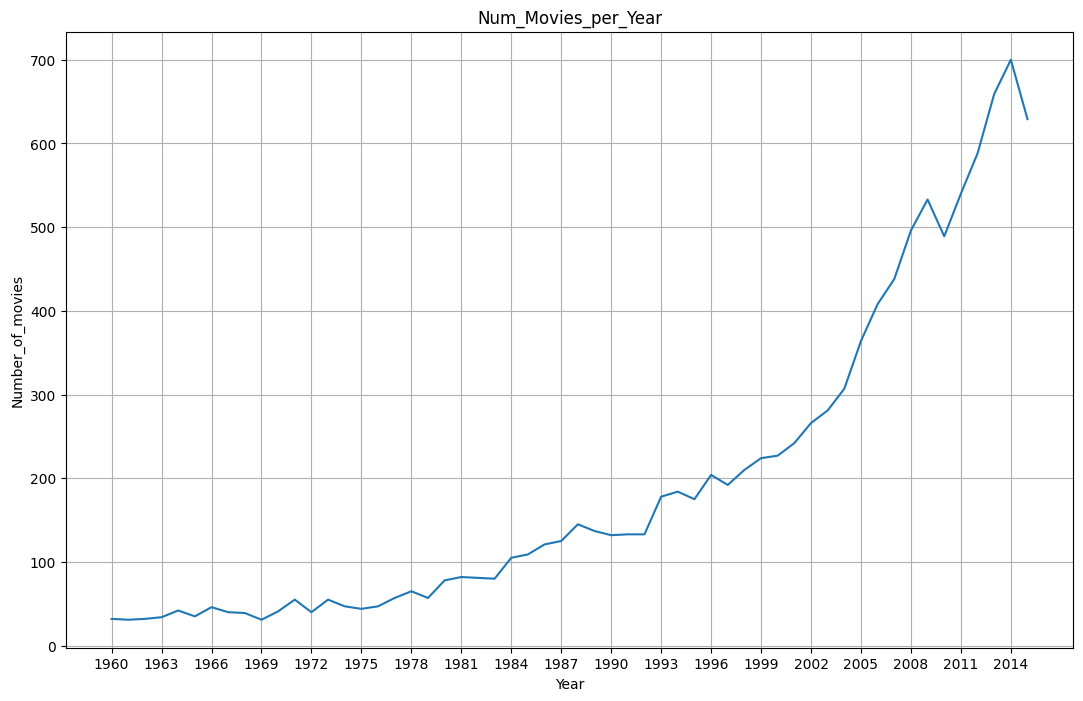

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data=df1.groupby('release_year').count()['id']
print(data.tail())
data.plot(
    figsize=(13,8),
    title="Num_Movies_per_Year",
    xlabel="Year",
    ylabel="Number_of_movies",
    grid=True,
    xticks = np.arange(df.release_year.min(),df.release_year.max()+1,3)
)

> **Inference**
From the above graph we can conclude
2014 saw highest release of movies (700), followed by 2013 (659) and 2015 (629). Overall the movie industry seems to be on rise from 1960 onwards

### Research Question 2  (Find the lowest profit movie and highest profit movie in the database)

In [18]:
# Create a dataframe with minimum and maximum profit records
# Minimum Id
min_profit = df1.profit.idxmin()
# Maximum Id
max_profit = df1.profit.idxmax()

# Concat both of them and create temp dataframe
temp=pd.concat([df1.loc[min_profit,:],df1.loc[max_profit,:]],axis=1)
temp

,2244,1386
id,46528,19995
popularity,0.25054,9.432768
budget,425000000,237000000
revenue,11087569,2781505847
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
overview,An Asian assassin (Dong-gun Jang) is forced to...,"In the 22nd century, a paraplegic Marine is di..."
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction


> **Inference**
1. Movie with most loss (lowest profit) is **The Warrior's way**
2. Movie with most profit (highest profit) is **Avatar**

### Research Question 3  (Highest Budget Movie and Lowest Budget Movie)

In [19]:
low_budget = df1.budget.idxmin()
high_budget = df1.budget.idxmax()
temp=pd.concat([df1.loc[low_budget,:],df1.loc[high_budget,:]],axis=1)
temp

,30,2244
id,280996,46528
popularity,3.927333,0.25054
budget,0,425000000
revenue,29355203,11087569
original_title,Mr. Holmes,The Warrior's Way
cast,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Bill Condon,Sngmoo Lee
overview,"The story is set in 1947, following a long-ret...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,103,100
genres,Mystery|Drama,Adventure|Fantasy|Action|Western|Thriller


> **Inference**
1. The highest budget movie seems to be **The Warrior's way**. 
2. However the lowest budget movie seems to be _incorrect_ as the budget is at 0 which can't be true. 
3. Due to data incorrectness in the budget its difficult to conclude that the lowest budget movie is **Mr. Holmes**
4. we need to exclude the movie which has budget 0 and check the next low budget movie

#### Identify the movie which has 0 in budget and replace with NAN

In [20]:
#replace the column budget which has value 0 with NAN
df1['budget']=df1['budget'].replace(0,np.NAN)

#now find the low budget
low_budget = df1.budget.idxmin()
temp=pd.concat([df1.loc[low_budget,:],df1.loc[high_budget,:]],axis=1)
temp

,1151,2244
id,287524,46528
popularity,0.177102,0.25054
budget,1.0,425000000.0
revenue,0,11087569
original_title,Fear Clinic,The Warrior's Way
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Robert Hall,Sngmoo Lee
overview,A doctor works to cure patients suffering from...,An Asian assassin (Dong-gun Jang) is forced to...
runtime,95,100
genres,Horror,Adventure|Fantasy|Action|Western|Thriller


> **Inference**
**Fear Clinic** is identified as the next low budget movie which has _USD 1_ budget. Its improbable to produce a movie with that kind of budget. Hence i assume that there are data incorrectness is present in budget column especially when it comes to low budgets.

### Research Question 4  (Find 10 High budget movies)

In [21]:
# Define a common function which will sort the values by a column on descending order and returns a dataframe
# this function will be used for most of the high column related queries

def mydf_sort_values(x):
    return df1.sort_values(by=x,ascending=False)

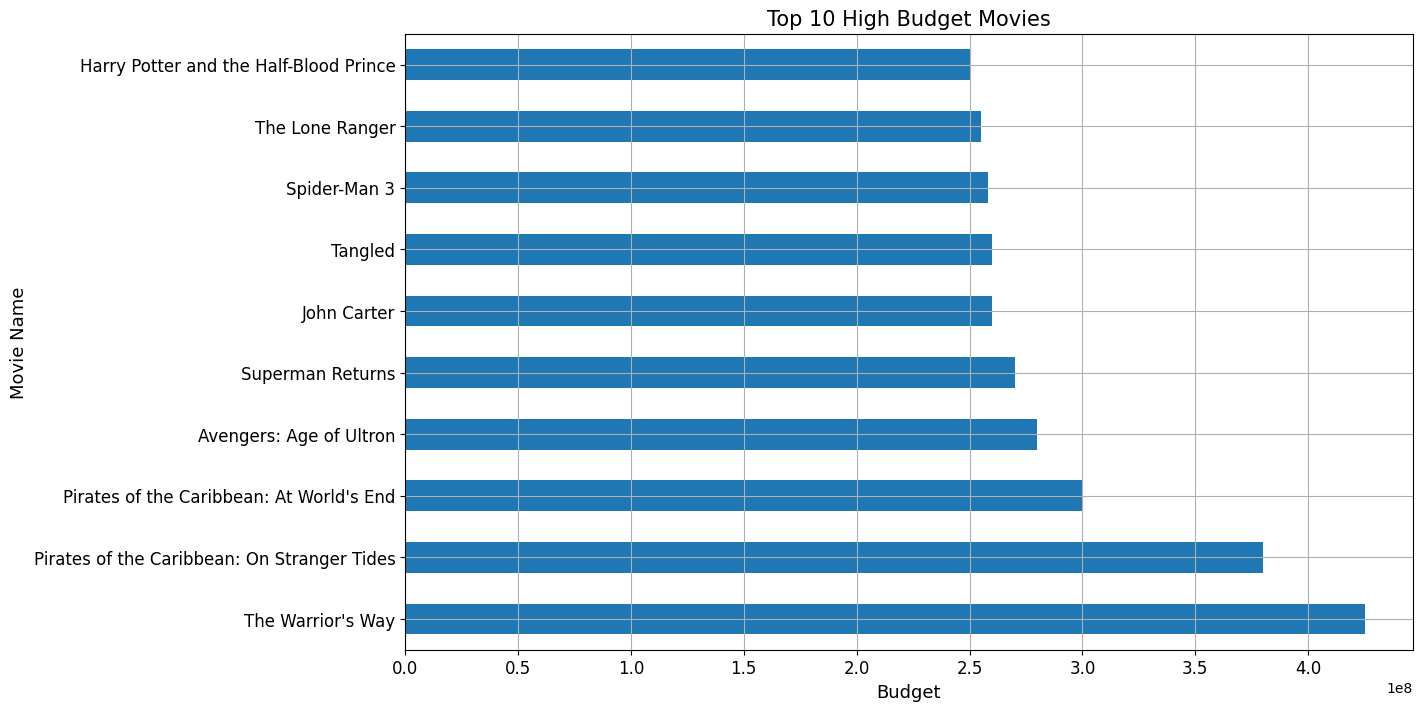

In [22]:
# Call the function to get data frame sorted by budget
sorted_df = mydf_sort_values('budget')

# map this frame with the original title
high_budget=pd.DataFrame(sorted_df[['budget','original_title']])

# Take the top 10 and plot them
high_budget.head(10).plot(kind='barh',x='original_title', y='budget',legend=False,figsize=(13,8),fontsize=12,grid=True)
plt.xlabel('Budget',fontsize=13)
plt.ylabel('Movie Name',fontsize=13)
plt.title('Top 10 High Budget Movies',fontsize=15)
plt.show()

> **Inference** 

**The Warrior's Way** seems to be the highest budget movie amongst the Top 10 movies

### Research Question 5 (Find 10 high revenue movies)

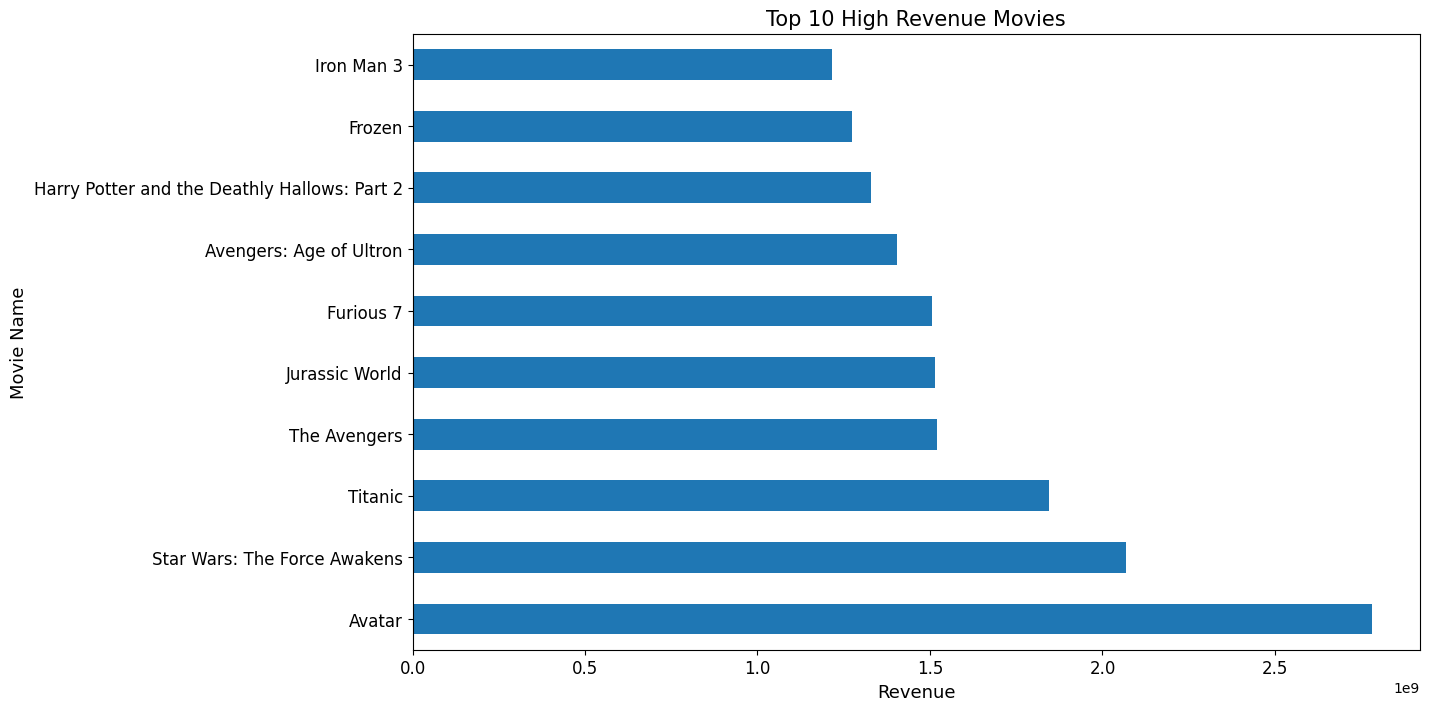

In [23]:
# Call the function to get data frame sorted by revenue
sorted_df = mydf_sort_values('revenue')

# map this frame with the original title
high_revenue=pd.DataFrame(sorted_df[['revenue','original_title']])

# Take the top 10 and plot them
high_revenue.head(10).plot(kind='barh',x='original_title', y='revenue',figsize=(13,8),fontsize=12,legend=False)
plt.xlabel('Revenue',fontsize=13)
plt.ylabel('Movie Name',fontsize=13)
plt.title('Top 10 High Revenue Movies',fontsize=15)
plt.show()

> **Inference**

**Avatar** is the highest revenue collection amongst the top 10 movies.

### Research Question 6 (Find Top 10 high profit movies)

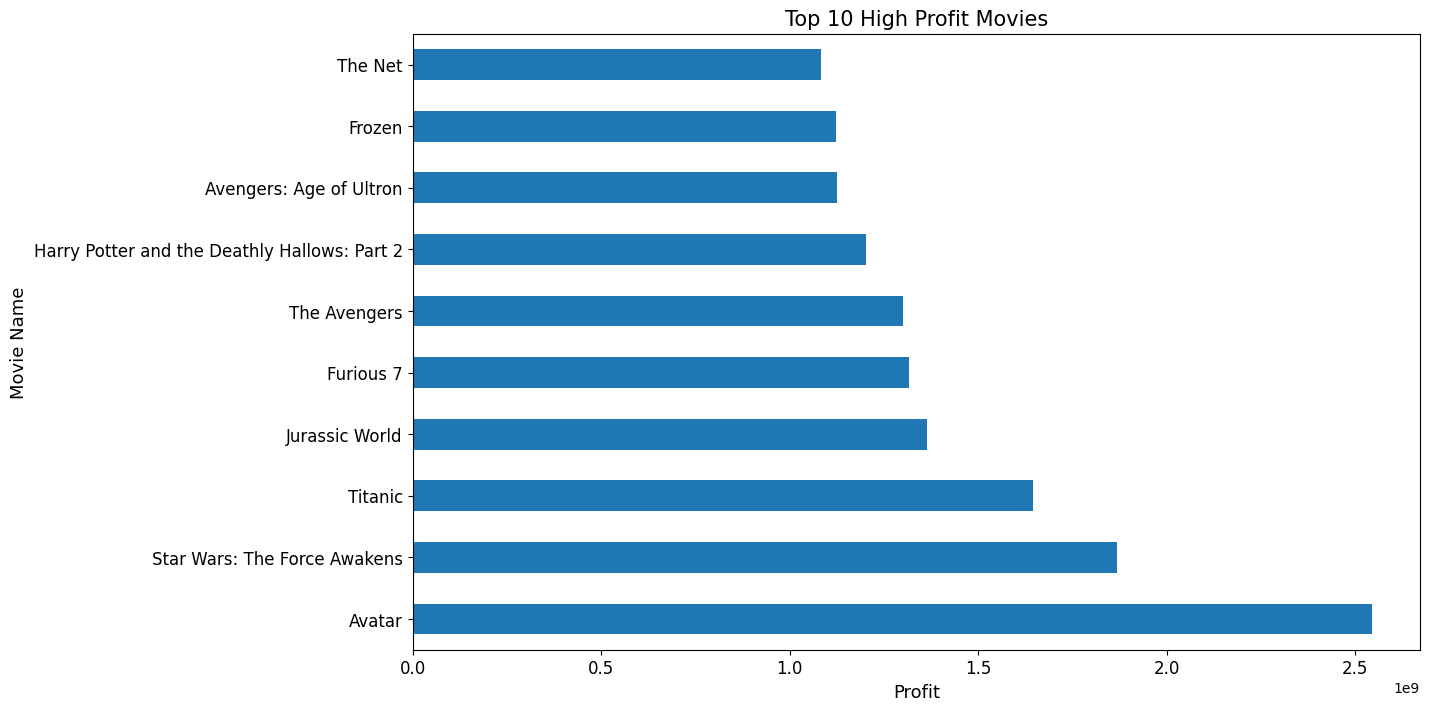

In [24]:
# Call the function to get data frame sorted by profit
sorted_df = mydf_sort_values('profit')

# map this frame with the original title
high_profit=pd.DataFrame(sorted_df[['profit','original_title']])

# Take the top 10 and plot them
high_profit.head(10).plot(kind='barh',x='original_title', y='profit',figsize=(13,8),fontsize=12,legend=False)
plt.xlabel('Profit',fontsize=13)
plt.ylabel('Movie Name',fontsize=13)
plt.title('Top 10 High Profit Movies',fontsize=15)
plt.show()

>**Inference**

**Avatar** is highest profit generated movie. Followed by **Star Wars** and **Titanic** 

_Assumption is the budget and revenue figures are correct_.

### Research Question 7 (Which Genre movies produced more over years)

In [25]:
# define a common function to split a columns with a defined delimiter and returns a data frame with all split data as rows
"""
Function Utility split the column, expand them, stack all these data in one columns, reset index to avoid duplicate indices
renames it again as original column name
"""
def mydf_col_split(col,dlim):
    return df1[col].str.split(dlim,expand=True).stack().reset_index(level=1,drop=True).rename(col)

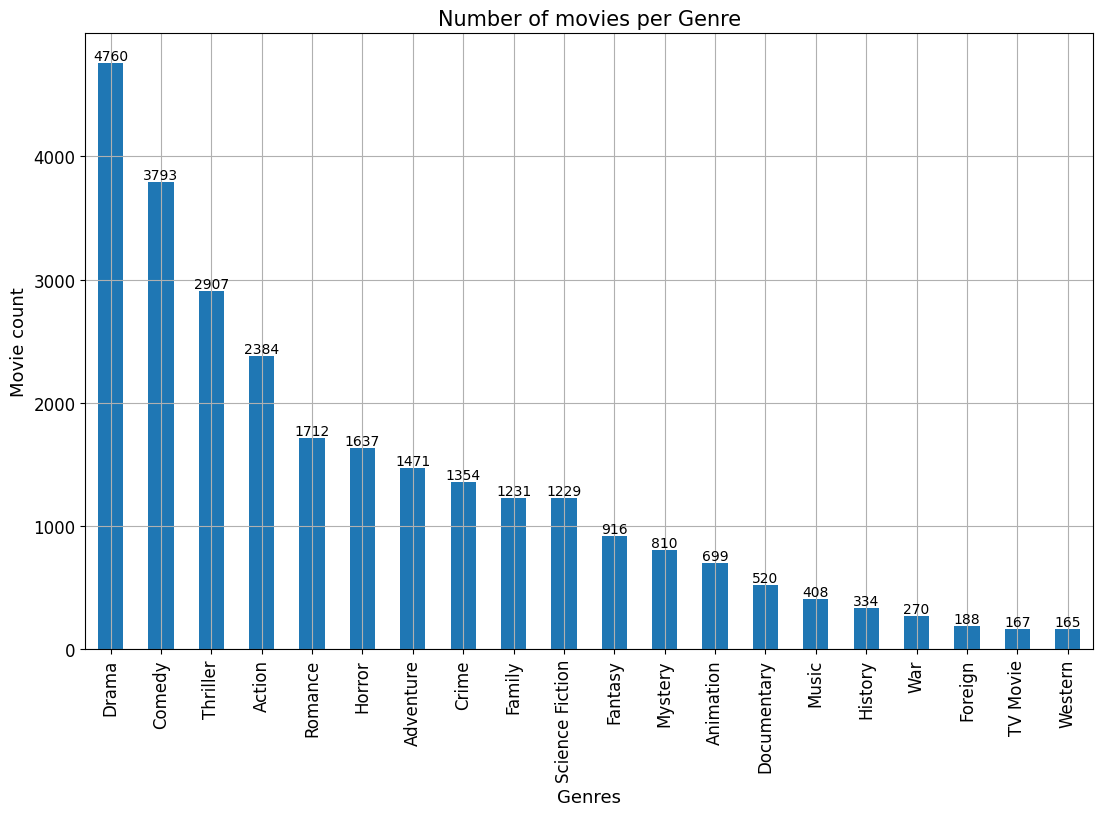

In [26]:
# call function to split genres columns
df_genres = mydf_col_split('genres','|')

# sort the genres in descending order
genres_counts=df_genres.value_counts().sort_values(ascending=False)

# now we plot the graph
ax = genres_counts.plot(kind='bar',figsize=(13,8),fontsize=12,grid=True)
plt.xlabel('Genres',fontsize=13)
plt.ylabel('Movie count', fontsize=13)
plt.title('Number of movies per Genre', fontsize=15)

# adding the number on top of each bar
for i in ax.containers:
    ax.bar_label(i)

# show the graph
plt.show()

### Research Question 8 (Top 10 Actors and Number of Movies they acted)

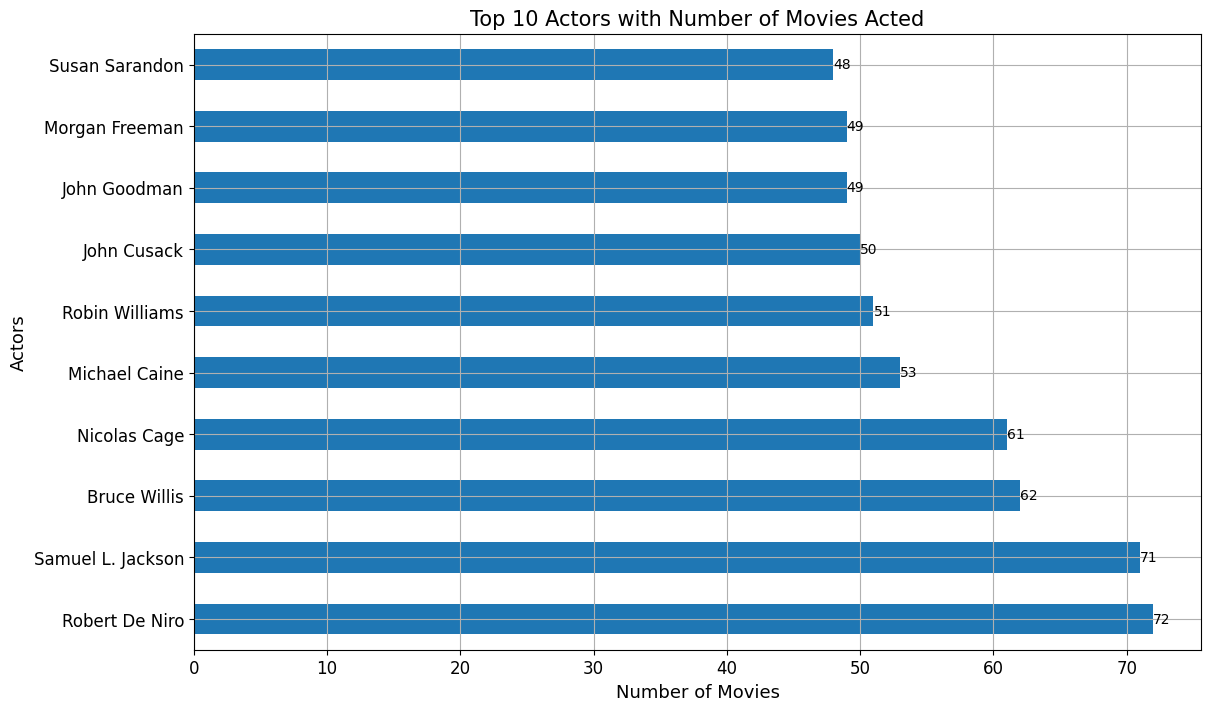

In [27]:
# call function to split cast columns
df_cast = mydf_col_split('cast','|')
# sort the genres in descending order
cast_counts=df_cast.value_counts().sort_values(ascending=False)
ax=cast_counts.head(10).plot(kind='barh',x='Actors', y='Count of Movies',legend=False,figsize=(13,8),fontsize=12,grid=True)
plt.xlabel('Number of Movies',fontsize=13)
plt.ylabel('Actors', fontsize=13)
plt.title('Top 10 Actors with Number of Movies Acted', fontsize=15)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

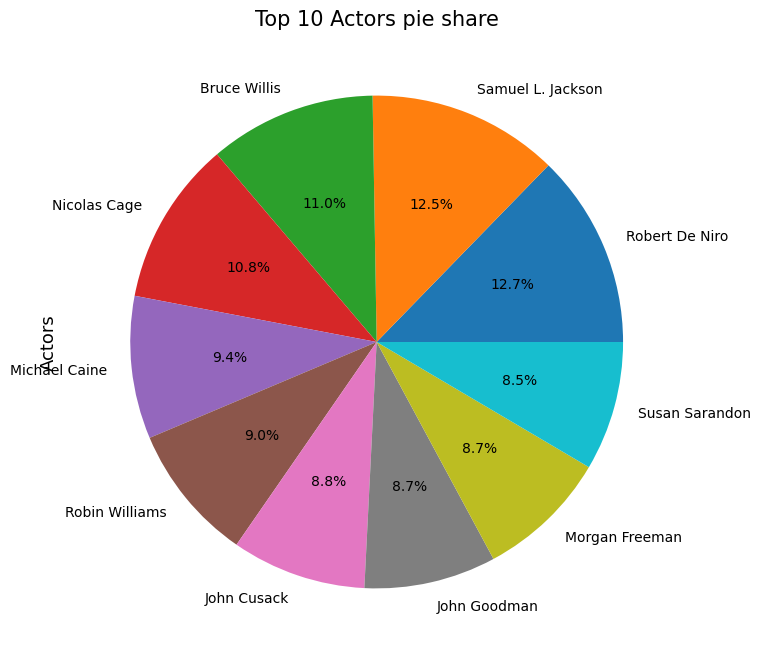

In [28]:
# Plot the same data in pie chart as well
cast_counts.head(10).plot.pie(figsize=(13,8),autopct='%1.1f%%')
plt.ylabel('Actors', fontsize=13)
plt.title('Top 10 Actors pie share', fontsize=15)
plt.show()

>**Inference**
Top 3 actors out of top 10 actors are 
1. **Robert De Niro** acted in _72_ movies and takes _12.7%_ of share of movies from the top 10%
2. **Samuel L Jackson** comes second with _71_ movies and _12.5%_
3. **Bruce Willis** comes third with _62_ movies and _11.0%_ 

### Research Question 9 (Top 10 Directors with Count of Movies)

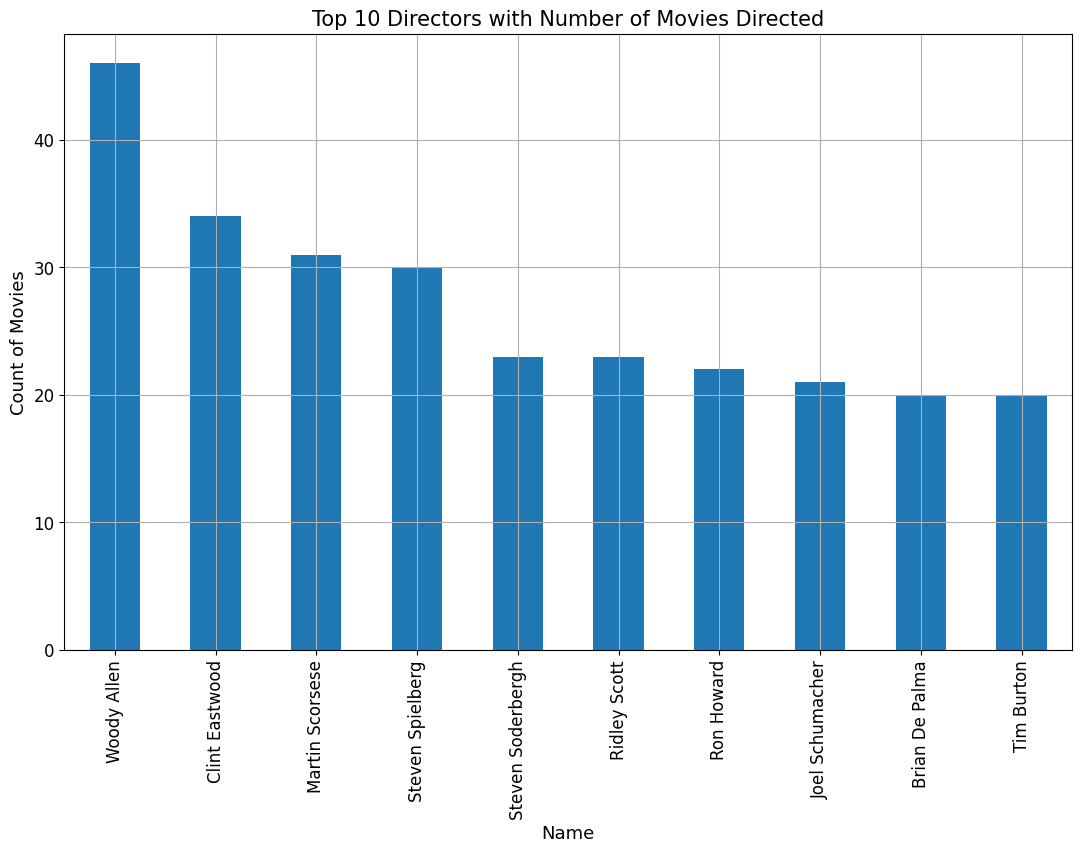

In [29]:
# call function to split director columns
df_directors = mydf_col_split('director','|')

# sort the genres in descending order
cast_counts=df_directors.value_counts().sort_values(ascending=False)

#plot the top 10 directors 
cast_counts.head(10).plot(kind='bar',x='Director', y='Count of Movies',legend=False,figsize=(13,8),fontsize=12,grid=True)
plt.xlabel('Name',fontsize=13)
plt.ylabel('Count of Movies', fontsize=13)
plt.title('Top 10 Directors with Number of Movies Directed', fontsize=15)
plt.show()

>**Inference**
The above graph shows the top 10 directors and **Woody Allen** **Clint Eastwood** and **Martin Scorsesse** have directed who most movies

### Research Question 10 (Popularity vs Runtime ?)

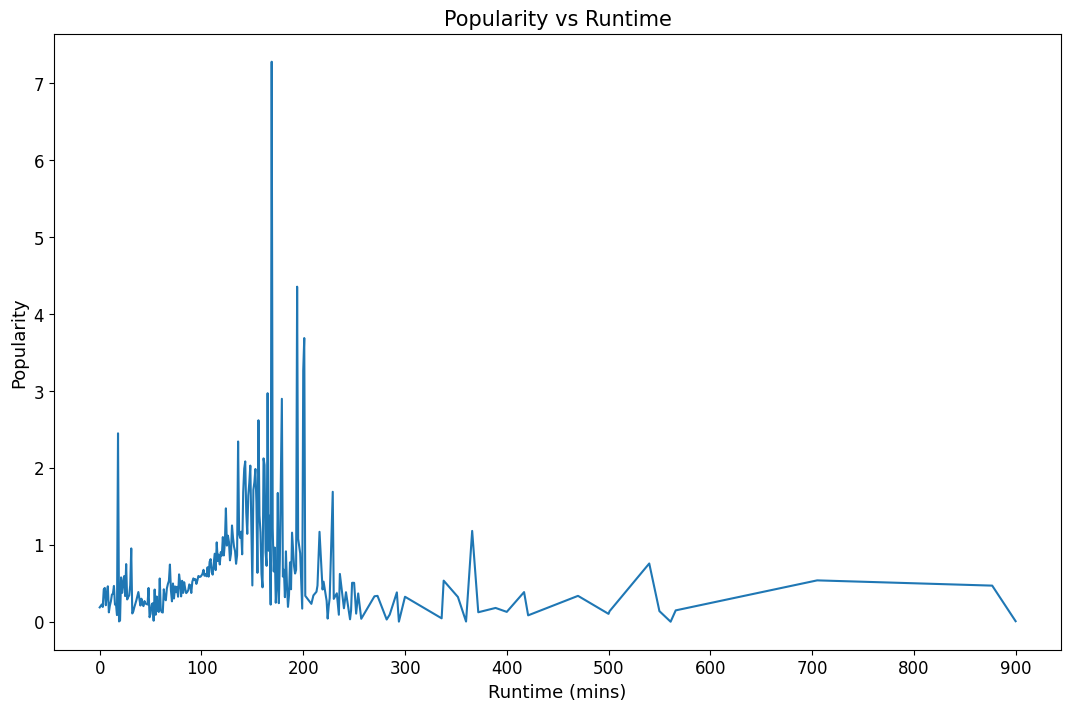

In [30]:
#group by runtime and take mean of popularity 
rt_vs_pop=df1.groupby('runtime')['popularity'].mean()

# Plot the graph
rt_vs_pop.plot(figsize=(13,8),xticks=np.arange(0,1000,100),fontsize=12)
plt.xlabel("Runtime (mins)",fontsize=13)
plt.ylabel("Popularity",fontsize=13)
plt.title("Popularity vs Runtime",fontsize=15)
plt.show()


>**Inference** 
From the above graph we can understand the popularity of a movie is high when the runtime is between 100-200 minutes. Beyond that the popularity comes down.

<a id='conclusions'></a>
## Conclusions

* Overall producing and releasing movies has been increasing from 1960s. 
* Maximum movies were released in 2014
* Drama, Comedy, Thriller and Action are the most genres made as per the records
* The Warrior's Way seems to be an expensive movie but didn't generate good profits
* Avatar, Star Wars and Titanic seems to be top 3 profitable movies
* Robert D Niro, Samuel Jackson and Bruce Willis are the top 3 actors 
* Woody Allen, Clint Eastwood and Martin are the top 3 directors

## Limitations
* Budget and Revenue figures have 0 or low values (USD 1). Hence i believe there are data inconsistency.Hence budget/profit related analysis might have some errors/bias when compared to real life.
* Most of my analysis seems to be pretty basic/rudimentary rather than using statistical methods like **correlation** , **standard_deviation** etc to derive some concrete analysis. for eg: i didnt use some of the fields like vote_count, vote_average etc

In [31]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1020061 bytes to Investigate_a_Dataset.html
